### **Problem Statement**



One of the aspects Seattle is most notable for, in addition to coffee, grunge, and electronic businesses, is its rains. From January 1, 1948 to December 12, 2017, this dataset provides full records of Seattle's daily rainfall patterns.



### **Dataset**



seattleWeather_1948-2017.csv

Link: https://www.dropbox.com/sh/wn9hcqrcl6oessl/AACVl-_f6Hx1JL0Odltrm6w6a?dl=0



### **Data Dictionary**

Following are the variables with their definition and key:

|Variables|Description|
|:-|:-|
|DATE| The date of the observation|
|PRCP |The amount of precipitation, in inches|
|MAX |The maximum temperature for that day, in degrees Fahrenheit|
|TMIN |The minimum temperature for that day, in degrees Fahrenheit|
|RAIN |TRUE if rain was observed on that day, FALSE if it was not|


### **Solution**

#### **Import Libraries**
- Pandas is a Python library for data manipulation and analysis.
- NumPy is a package that contains a multidimensional array object and several derived ones.
- Matplotlib is a Python visualization package for 2D array plots.
- Seaborn is built on top of matplotlib. It's used for exploratory data analysis and data visualization.
- To work with dates as date objects, use Datetime.

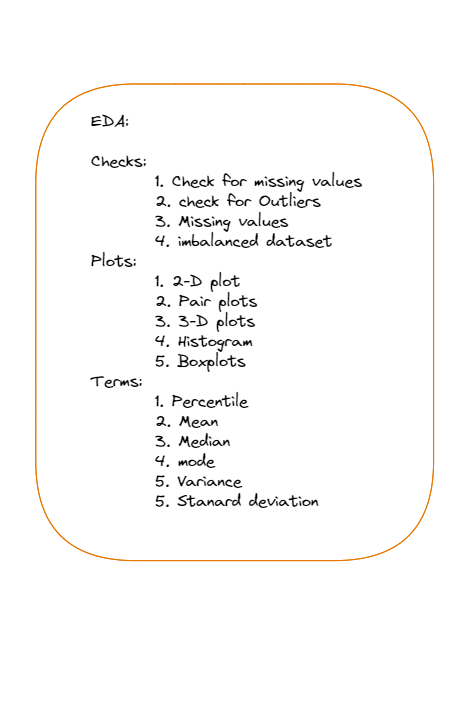

In [33]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

#### **Data Acquisition**

Before reading data from the CSV file, you need to download the "seattleWeather_1948-2017.csv" dataset from the resource section and upload it to the Lab.
We will use the Up arrow icon which is shown on the left side under the View icon. Click on the Up arrow icon and upload the file
wherever it is downloaded in your system.

After this, you will see the downloaded file on the left side of your lab with all the .ipynb files.

#### Loading the dataset

In [34]:
data = pd.read_csv('./seattleWeather_1948-2017.csv')

#### Preview the information of first 5 weather conditions

In [36]:
data.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


#### Preview the information of last 5 weather conditions.

In [37]:
data.tail(10)

,DATE,PRCP,TMAX,TMIN,RAIN
25541,2017-12-05,0.0,45,33,False
25542,2017-12-06,0.0,52,36,False
25543,2017-12-07,0.0,52,34,False
25544,2017-12-08,0.0,43,29,False
25545,2017-12-09,0.0,44,29,False
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


#### Check the name of all columns available in dataset

In [38]:
#See columns in data
data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

#### A Python data frame's summary statistics are computed and shown using the describe() function.

---

In [7]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [39]:
data.isna().sum(axis=0)

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

#### **Finding and Treating Null Values**

To make our data trainable, it is important to get rid of the null values. 

Following are the techniques used to fix the missing values:

* Substituting the null values with either the median or mean
  
    Note: Median is preferred, as it is more robust to outliers.

* Dropping the column for the instances where the majority of data is missing


#### Now, let's deep dive to get specific detail in the missing column.

In [9]:
#Finding rows having null values in the 'PRCP' columns
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


There are **three rows** in **'PRCP'** column which have null values

In [41]:
#Finding rows having null values in the 'RAIN' columns
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


There are **three rows** in **'RAIN'** column which have null values


We learned from the above code that there is a missed value for the 9/5/2005 date column for PRCP and RAIN.




#### Plot graph to determine the chances of rain

<AxesSubplot:xlabel='RAIN', ylabel='count'>

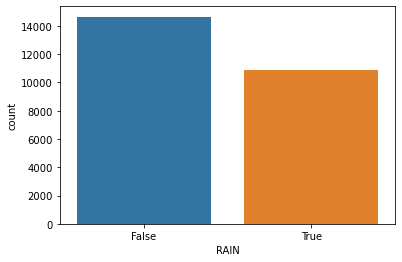

In [11]:
sns.countplot(data=data, x='RAIN')

We can see from the figure above that there are less chances of rain. So, in the missing information, we can just insert "False".

In [42]:
#It is safer to insert a mean value in the PRCP column instead of dropping one row.
data['PRCP'].mean()

0.10622162204477956

#### Custom function to determine the chances of 'RAIN'

In [43]:
def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN

In [44]:
#Applying function to determine the chances of rain
data['RAIN']=data[['RAIN']].apply(RAIN_INSERTION,axis=1)

#### Custom function to determine the amount of 'Precipitation'

In [45]:
def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return data['PRCP'].mean()
    else:
        return PRCP

In [46]:
##Applying function to determine the chances of rain
data['PRCP']=data[['PRCP']].apply(PRCP_INSERTION,axis=1)



Now, let's check if the function worked or not.



In [47]:
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [48]:
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


#### **Exploratory Data Analysis**


#### Plot graph to determine the correlation between Precipitation and Minimum Temperature

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

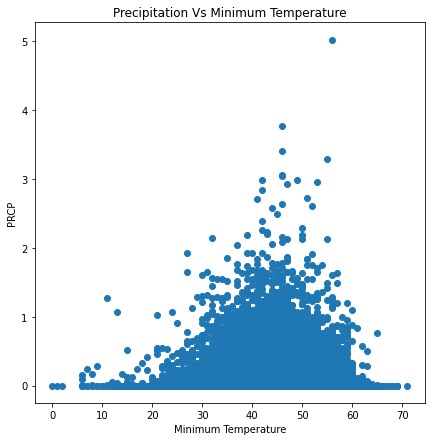

In [19]:
#First explore data for Temperature and Percipitation
plt.figure(figsize=(7,7))
plt.scatter(x='TMIN',y='PRCP',data=data)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

The graph shows that when the minimum temperature is between 30 and 60 degrees, the amount of precipitation increases

#### Plot graph to determine the correlation between Precipitation and Maximum Temperature

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

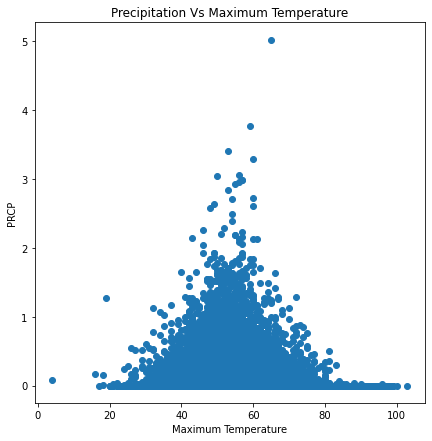

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=data)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')

The graph shows that when the maximum temperature is between 40 and 80 degrees, the amount of precipitation increases.

#### Plot graph to determine the overall distribution of minimum temperature 

<AxesSubplot:xlabel='TMIN', ylabel='Density'>

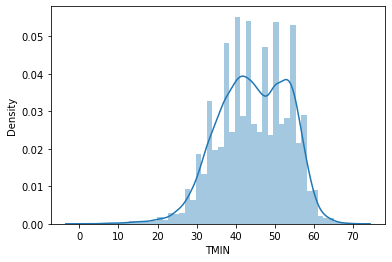

In [21]:
#Plotting Distribution Plot
sns.distplot(data['TMIN'])

The graph shows increasing density when the minimum temperature is between 30 to 60 degrees.

#### Plot graph to determine the overall distribution of maximum temperature 

<AxesSubplot:xlabel='TMAX', ylabel='Density'>

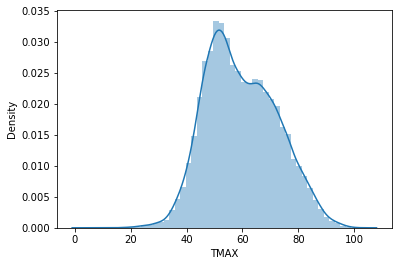

In [22]:
#Plotting Distribution Plot
sns.distplot(data['TMAX'])

The graph shows increasing density when the maximum temperature is between 40 to 60 degrees.

#### Plot graph to determine pairwise relationship between precipitation, maximum temperature, and minimum temperature

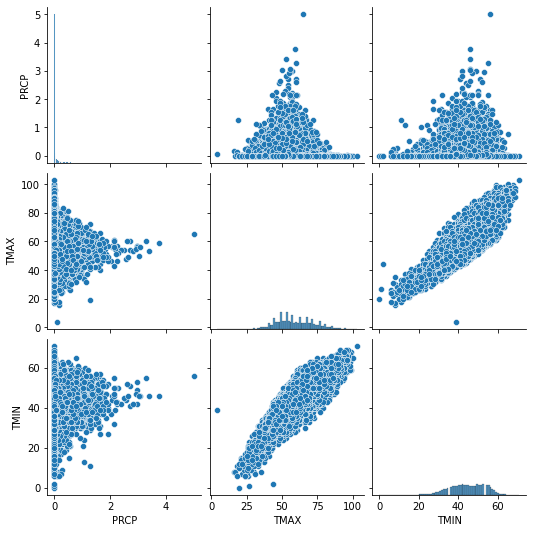

In [23]:
#Plotting pairplot
sns.pairplot(data=data)

The graph shows relationship between amount of precipitation, maximum, and minimum temperature.

#### Plot graph to determine the outliers in precipitation, maximum temperature, and minimum temperature

---

<AxesSubplot:>

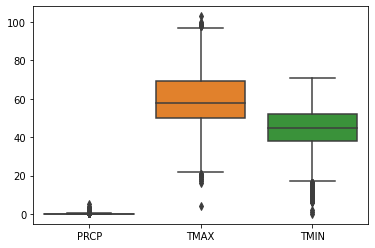

In [24]:
#Plotting boxplot 
sns.boxplot(data=data)

From the above figure, we can say that there are some outliers.



##### **Outlier Treatment**

Let's remove the outliers from the data.

In [49]:
#Dropping the outliers from TMIN column
data=data.drop(data[data['TMIN']<17 ].index)

In [50]:
#Dropping the outliers from TMAX columns i.e. the value more than 100
data=data.drop(data[(data['TMAX']>97.5) | (data['TMAX']< 21.5)].index)

In [51]:
#Dropping the outliers from PRCP columns i.e. the value more than 0.275
data=data.drop(data[(data['PRCP']>0.25) | (data['PRCP']< -0.15) ].index)

##### Let's check whether the outliers are removed or not.



<AxesSubplot:>

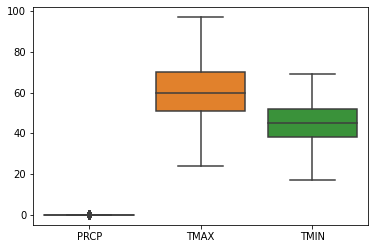

In [52]:
sns.boxplot(data=data)

#### Importing Logistic Regression Model

In [53]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [54]:
#Importing "train_test-split" function to test the model
from sklearn.model_selection import train_test_split

In [55]:
X=data.drop(['RAIN','DATE'],axis=1)
y=data['RAIN']
y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
#Fit the model in train and test data
lr.fit(X_train,y_train).score(X_train,y_train)

0.9156933115823818

![Simplilearn_Logo](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Logo_Powered_By_Simplilearn/SL_Logo_1.png)